In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
with open("Test.txt") as f:
    fb_links = f.read().splitlines()   #read testing dataset here have 1000 values in testing dataset

len(fb_links)

1000

In [3]:
with open("train4000.txt") as t:
    tb_links = t.read().splitlines() #read training dataset here have 1000 values in training dataset

len(tb_links)

4000

In [4]:
node_list_1 = []
node_list_2 = []

for i in tqdm(fb_links):
    node_list_1.append(i.split(' ')[0])       #list the node for testing
    node_list_2.append(i.split(' ')[1])

test_set = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1003422.01it/s]


In [5]:
node_list_3 = []
node_list_4 = []

for i in tqdm(tb_links):
    node_list_3.append(i.split(' ')[0])          #list the node for training
    node_list_4.append(i.split(' ')[1])

train_set = pd.DataFrame({'node_3': node_list_3, 'node_4': node_list_4})

100%|██████████████████████████████████████████████████████████████████████████| 4000/4000 [00:00<00:00, 634611.19it/s]


In [6]:
test_set.sort_values(by='node_1')

,node_1,node_2
5,100194,103096
8,100194,106880
152,100249,112500
533,100394,125226
516,100536,108174
...,...,...
429,98765,129229
942,98933,123633
136,99165,128926
637,99798,121653


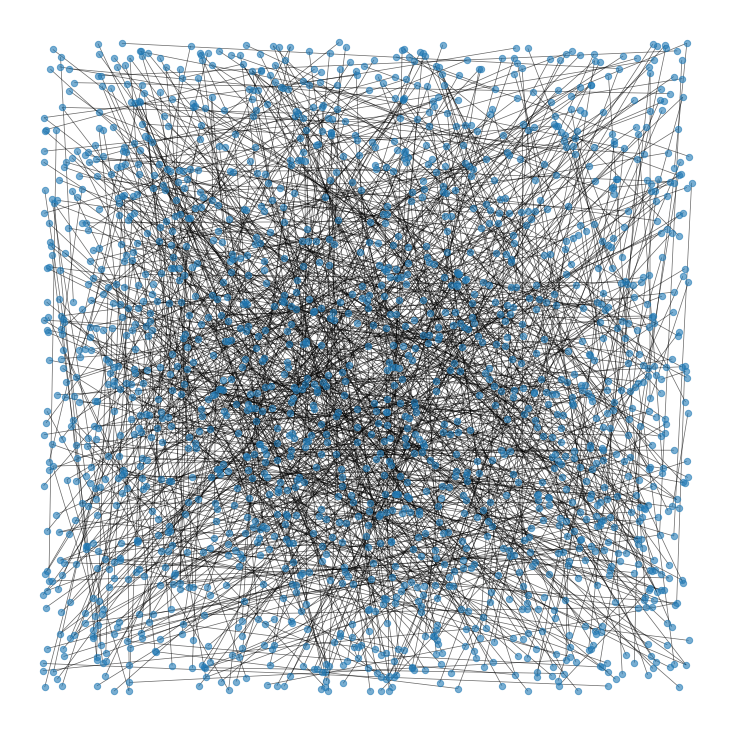

In [7]:

G_test = nx.from_pandas_edgelist(test_set, "node_1", "node_2", create_using=nx.Graph())


plt.figure(figsize=(10,10))                                        #Build an undirected graph for testing

pos = nx.random_layout(G_test, seed=23)
nx.draw(G_test, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

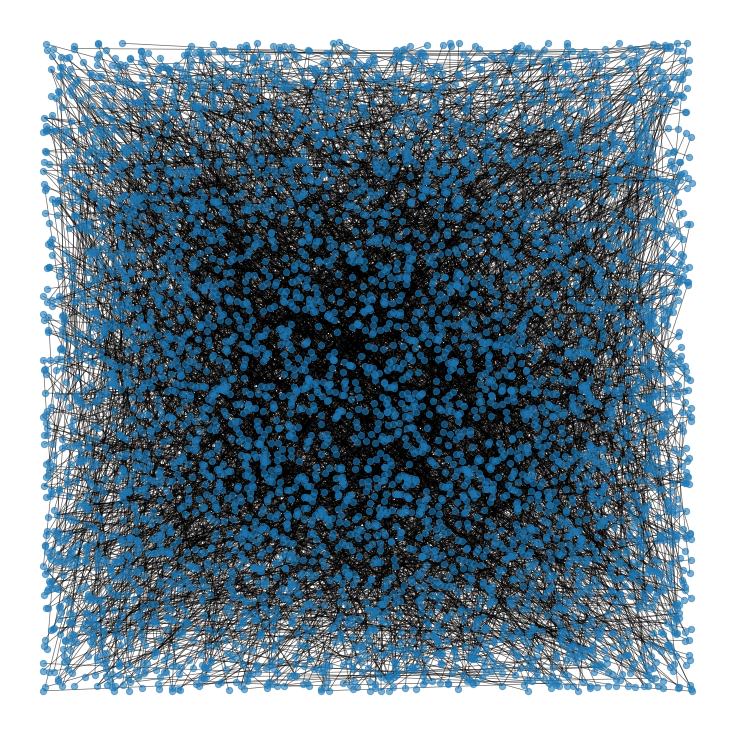

In [8]:

G_train = nx.from_pandas_edgelist(train_set, "node_3", "node_4", create_using=nx.Graph())


plt.figure(figsize=(10,10))                               #Build an undirected graph for training

pos = nx.random_layout(G_train, seed=23)
nx.draw(G_train, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)

plt.show()

In [9]:

node_list_test = node_list_1 + node_list_2

node_list_test = list(dict.fromkeys(node_list_test))
node_list_test

adj_G_test = nx.to_numpy_matrix(G_test,nodelist = node_list_test)               #build adjacency matrix for testing

In [10]:
len(node_list_test)

1736

In [11]:
adj_G_test

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [12]:

all_unconnected_pairs_test = []


offset = 0
for i in tqdm(range(adj_G_test.shape[0])):
    for j in range(offset,adj_G_test.shape[1]):               #get the matchpair of the node which have shortest path less than 2 and collect the unmatch pairs from testing dataset.
        if i != j:
            if nx.has_path(G_test,node_list_test[i], node_list_test[j])==False:
                all_unconnected_pairs_test.append([node_list_test[i],node_list_test[j]])
            elif nx.has_path(G_test,node_list_test[i], node_list_test[j])==True and nx.shortest_path_length(G_test, node_list_test[i], node_list_test[j])<=2:
                if adj_G_test[i,j]==0:
                    all_unconnected_pairs_test.append([node_list_test[i],node_list_test[j]])
    offset = offset + 1

100%|█████████████████████████████████████████████████████████████████████████████| 1736/1736 [00:09<00:00, 176.78it/s]


In [13]:
all_unconnected_pairs_test

[['69869', '17146'],
 ['69869', '42438'],
 ['69869', '98545'],
 ['69869', '26477'],
 ['69869', '100194'],
 ['69869', '28810'],
 ['69869', '57915'],
 ['69869', '52682'],
 ['69869', '18314'],
 ['69869', '84585'],
 ['69869', '69493'],
 ['69869', '97904'],
 ['69869', '51360'],
 ['69869', '47856'],
 ['69869', '53213'],
 ['69869', '55799'],
 ['69869', '21084'],
 ['69869', '64054'],
 ['69869', '74991'],
 ['69869', '42164'],
 ['69869', '25066'],
 ['69869', '31471'],
 ['69869', '16035'],
 ['69869', '640'],
 ['69869', '1086'],
 ['69869', '4239'],
 ['69869', '66205'],
 ['69869', '91025'],
 ['69869', '40270'],
 ['69869', '34893'],
 ['69869', '77436'],
 ['69869', '19776'],
 ['69869', '19696'],
 ['69869', '76026'],
 ['69869', '56221'],
 ['69869', '31756'],
 ['69869', '14691'],
 ['69869', '39741'],
 ['69869', '20732'],
 ['69869', '54746'],
 ['69869', '10479'],
 ['69869', '41668'],
 ['69869', '14186'],
 ['69869', '24972'],
 ['69869', '65276'],
 ['69869', '21859'],
 ['69869', '25501'],
 ['69869', '4970

In [14]:
node_1_unlinked = [i[0] for i in all_unconnected_pairs_test]
node_2_unlinked = [i[1] for i in all_unconnected_pairs_test]       

data_test = pd.DataFrame({'node_1':node_1_unlinked,   #put every un match pair into a dataframe which is from testing dataset
                     'node_2':node_2_unlinked})


data_test['link'] = 0

In [15]:
test_set['link'] = 1
data_test = data_test.append(test_set[['node_1', 'node_2', 'link']], ignore_index=True)

In [16]:
data_test

,node_1,node_2,link
0,69869,17146,0
1,69869,42438,0
2,69869,98545,0
3,69869,26477,0
4,69869,100194,0
...,...,...,...
1505786,52252,113686,1
1505787,44323,103230,1
1505788,7428,80186,1
1505789,15224,75947,1


In [17]:
from node2vec import Node2Vec


node2vec_test = Node2Vec(G_test, dimensions=100, walk_length=16, num_walks=50)  #train node2vec model for testing


n2w_model_test = node2vec_test.fit(window=6, min_count=1)

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [00:45<00:00,  1.09it/s]


In [18]:

node_list_train = node_list_3 + node_list_4

node_list_train = list(dict.fromkeys(node_list_train))
node_list_train

adj_G_train = nx.to_numpy_matrix(G_train,nodelist = node_list_train)     #build adjacency matrix for training

In [19]:

all_unconnected_pairs_train = []


offset_train = 0
for i in tqdm(range(adj_G_train.shape[0])):
    for j in range(offset_train,adj_G_train.shape[1]):     #get the matchpair of the node which have shortest path less than 2 and collect the unmatch pairs from training dataset.
        if i != j:
            if nx.has_path(G_train,node_list_train[i], node_list_train[j])==False:
                all_unconnected_pairs_train.append([node_list_train[i],node_list_train[j]])
            elif nx.has_path(G_train,node_list_train[i], node_list_train[j])==True and nx.shortest_path_length(G_train, node_list_train[i], node_list_train[j])<=2:
                 
                if adj_G_train[i,j] == 0:
                    all_unconnected_pairs_train.append([node_list_train[i],node_list_train[j]])
    offset_train = offset_train + 1

100%|██████████████████████████████████████████████████████████████████████████████| 5068/5068 [09:08<00:00,  9.24it/s]


In [20]:
all_unconnected_pairs_train

[['70718', '24699'],
 ['70718', '39789'],
 ['70718', '26590'],
 ['70718', '102198'],
 ['70718', '54796'],
 ['70718', '25203'],
 ['70718', '76432'],
 ['70718', '22236'],
 ['70718', '64054'],
 ['70718', '41665'],
 ['70718', '51545'],
 ['70718', '17097'],
 ['70718', '9039'],
 ['70718', '874'],
 ['70718', '27327'],
 ['70718', '22892'],
 ['70718', '11472'],
 ['70718', '29732'],
 ['70718', '14402'],
 ['70718', '78847'],
 ['70718', '53213'],
 ['70718', '99324'],
 ['70718', '13142'],
 ['70718', '69090'],
 ['70718', '54856'],
 ['70718', '357'],
 ['70718', '48255'],
 ['70718', '31334'],
 ['70718', '37693'],
 ['70718', '47865'],
 ['70718', '542'],
 ['70718', '11443'],
 ['70718', '22017'],
 ['70718', '36814'],
 ['70718', '37328'],
 ['70718', '52028'],
 ['70718', '44785'],
 ['70718', '56381'],
 ['70718', '69274'],
 ['70718', '32003'],
 ['70718', '36617'],
 ['70718', '75948'],
 ['70718', '24583'],
 ['70718', '33040'],
 ['70718', '74336'],
 ['70718', '6058'],
 ['70718', '8615'],
 ['70718', '19888'],


In [21]:
node_3_unlinked = [i[0] for i in all_unconnected_pairs_train]
node_4_unlinked = [i[1] for i in all_unconnected_pairs_train]

data_train = pd.DataFrame({'node_3':node_3_unlinked,    #put every un match pair into a dataframe which is from training dataset
                     'node_4':node_4_unlinked})


data_train['link'] = 0

In [22]:
data_train

,node_3,node_4,link
0,70718,24699,0
1,70718,39789,0
2,70718,26590,0
3,70718,102198,0
4,70718,54796,0
...,...,...,...
11211748,111967,90538,0
11211749,111967,103768,0
11211750,119434,90538,0
11211751,119434,103768,0


In [23]:
initial_node_count_train = len(G_train.nodes)

train_temp = train_set.copy()


omissible_links_index_train = []

for i in tqdm(train_set.index.values):              #remove a node pair from training graphy and build a new graphy then check there nospliting of graphy and number of node is same 
  

    G_temp_train = nx.from_pandas_edgelist(train_temp.drop(index = i), "node_3", "node_4", create_using=nx.Graph())
  

    if (nx.number_connected_components(G_temp_train) >=1 ) and (len(G_temp_train.nodes) == initial_node_count_train):
        omissible_links_index_train.append(i)
        train_temp = train_temp.drop(index = i)

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [01:20<00:00, 49.84it/s]


In [24]:
omissible_links_index_train

[2,
 6,
 8,
 9,
 10,
 12,
 16,
 17,
 21,
 24,
 25,
 28,
 32,
 33,
 34,
 36,
 37,
 40,
 41,
 43,
 44,
 46,
 50,
 56,
 58,
 63,
 66,
 70,
 72,
 73,
 74,
 75,
 76,
 78,
 84,
 91,
 96,
 97,
 101,
 103,
 111,
 113,
 115,
 116,
 120,
 121,
 122,
 124,
 125,
 127,
 132,
 134,
 135,
 136,
 139,
 143,
 144,
 145,
 149,
 153,
 157,
 159,
 160,
 162,
 163,
 164,
 165,
 172,
 173,
 177,
 179,
 184,
 185,
 187,
 188,
 191,
 195,
 197,
 202,
 204,
 206,
 207,
 209,
 211,
 214,
 216,
 217,
 220,
 222,
 223,
 226,
 227,
 229,
 232,
 241,
 242,
 244,
 248,
 250,
 255,
 258,
 259,
 260,
 261,
 262,
 263,
 269,
 271,
 281,
 284,
 286,
 287,
 289,
 297,
 301,
 302,
 303,
 305,
 306,
 307,
 313,
 314,
 317,
 318,
 320,
 322,
 323,
 329,
 339,
 340,
 341,
 356,
 357,
 358,
 360,
 361,
 362,
 364,
 365,
 370,
 374,
 376,
 380,
 382,
 384,
 386,
 390,
 393,
 395,
 399,
 400,
 404,
 412,
 413,
 417,
 419,
 421,
 422,
 426,
 428,
 430,
 431,
 434,
 436,
 439,
 443,
 444,
 445,
 447,
 449,
 451,
 452,
 453,
 455

In [25]:

train_ghost = train_set.loc[omissible_links_index_train]                     # create dataframe of removable edges from training set and add the target variable 'link'

             
train_ghost['link'] = 1

data_train = data_train.append(train_ghost[['node_3', 'node_4', 'link']], ignore_index=True)


In [26]:

train_partial = train_set.drop(index=train_ghost.index.values)            #drop removable edges from training set and build graph


G_data_train = nx.from_pandas_edgelist(train_partial, "node_3", "node_4", create_using=nx.Graph())


In [27]:
from node2vec import Node2Vec

         
node2vec_train = Node2Vec(G_data_train, dimensions=100, walk_length=16, num_walks=50)            #train node2vec model for training


n2w_model_train = node2vec_train.fit(window=6, min_count=1)

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 50/50 [02:09<00:00,  2.59s/it]


In [28]:
xtest=[(n2w_model_test[str(i)]+n2w_model_test[str(j)]) for i,j in zip(data_test['node_1'],data_test['node_2'])]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [29]:
xtrain=[(n2w_model_train[str(i)]+n2w_model_train[str(j)]) for i,j in zip(data_train['node_3'],data_train['node_4'])]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [30]:
x_train = np.array(xtrain)
y_train = data_train['link']
x_test = np.array(xtest)
y_test = data_test['link']

In [31]:
lr = LogisticRegression(C=0.5,class_weight="balanced",solver='saga')

lr.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = lr.predict_proba(x_test)
roc_auc_score(y_test, predictions[:,1])

0.49714397481112005

In [33]:
import lightgbm as lgbm

train_data = lgbm.Dataset(x_train, y_train)
test_data = lgbm.Dataset(x_test, y_test)


parameters = {                                          #difine parameters and train lightgbm model
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'num_threads' : 2,
    'seed' : 76
}


model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   num_boost_round=1000,
                   early_stopping_rounds=20)

[1]	valid_0's auc: 0.577504
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.452378
[3]	valid_0's auc: 0.490715
[4]	valid_0's auc: 0.490715
[5]	valid_0's auc: 0.490715
[6]	valid_0's auc: 0.490715
[7]	valid_0's auc: 0.490715
[8]	valid_0's auc: 0.490715
[9]	valid_0's auc: 0.490715
[10]	valid_0's auc: 0.490715
[11]	valid_0's auc: 0.490715
[12]	valid_0's auc: 0.490715
[13]	valid_0's auc: 0.490715
[14]	valid_0's auc: 0.490715
[15]	valid_0's auc: 0.490715
[16]	valid_0's auc: 0.490715
[17]	valid_0's auc: 0.490715
[18]	valid_0's auc: 0.490715
[19]	valid_0's auc: 0.490715
[20]	valid_0's auc: 0.490715
[21]	valid_0's auc: 0.490715
Early stopping, best iteration is:
[1]	valid_0's auc: 0.577504
